In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['chennai_reservoir_levels.csv', 'chennai_reservoir_rainfall.csv']


In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py

import cufflinks as cf
%matplotlib inline

init_notebook_mode(connected=True)
cf.go_offline()

plt.style.use('ggplot')

In [138]:
print(os.listdir("../input/"))

['chennai_reservoir_levels.csv', 'chennai_reservoir_rainfall.csv']


In [174]:
df_rlevels = pd.read_csv('../input/chennai_reservoir_levels.csv')
df_rlevels.head()

Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0  01-01-2004     3.9         0.0     268.0              0.0
1  02-01-2004     3.9         0.0     268.0              0.0
2  03-01-2004     3.9         0.0     267.0              0.0
3  04-01-2004     3.9         0.0     267.0              0.0
4  05-01-2004     3.8         0.0     267.0              0.0

In [140]:
df_rlevels.describe()

POONDI   CHOLAVARAM     REDHILLS  CHEMBARAMBAKKAM
count  5647.000000  5647.000000  5647.000000      5647.000000
mean   1133.272203   240.020572  1568.345573      1321.381645
std    1026.009311   274.601731   890.363617       957.057834
min       0.900000     0.000000     0.000000         0.000000
25%     213.000000    22.300000   849.000000       471.500000
50%     782.000000    92.000000  1630.000000      1225.000000
75%    2006.000000   460.000000  2236.000000      2083.000000
max    3231.000000   896.000000  3300.000000      3396.000000

In [175]:
df_rlevels['Month'] = df_rlevels['Date'].apply(lambda s: s.split('-')[1])
df_rlevels['Year'] = df_rlevels['Date'].apply(lambda s: s.split('-')[2])
df_rlevels['Date'] = pd.to_datetime(df_rlevels['Date'], format='%d-%m-%Y')
df_rlevels.set_index('Date',inplace=True)
##df_rlevels['Month'] = df_rlevels.index.month
##df_rlevels['Year'] = df_rlevels.index.year
df_rlevels['Total'] = df_rlevels['POONDI'] + df_rlevels['CHOLAVARAM'] + df_rlevels['REDHILLS'] +df_rlevels['CHEMBARAMBAKKAM']
df_rlevels.head()

In [187]:
df_rlevels['Total'] = df_rlevels['POONDI'] + df_rlevels['CHOLAVARAM'] + df_rlevels['REDHILLS'] +df_rlevels['CHEMBARAMBAKKAM']
df_rlevels.head()

POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM Month  Year  Total
Date                                                                        
2004-01-01     3.9         0.0     268.0              0.0    01  2004  271.9
2004-01-02     3.9         0.0     268.0              0.0    01  2004  271.9
2004-01-03     3.9         0.0     267.0              0.0    01  2004  270.9
2004-01-04     3.9         0.0     267.0              0.0    01  2004  270.9
2004-01-05     3.8         0.0     267.0              0.0    01  2004  270.8

In [145]:
df_rfall = pd.read_csv('../input/chennai_reservoir_rainfall.csv')

In [146]:
df_rfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null object
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [147]:
df_rfall.head()

Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0  01-01-2004     0.0         0.0       0.0              0.0
1  02-01-2004     0.0         0.0       0.0              0.0
2  03-01-2004     0.0         0.0       0.0              0.0
3  04-01-2004     0.0         0.0       0.0              0.0
4  05-01-2004     0.0         0.0       0.0              0.0

In [148]:
df_rfall['Month'] = df_rfall['Date'].apply(lambda s: s.split('-')[1])
df_rfall['Year'] = df_rfall['Date'].apply(lambda s: s.split('-')[2])
df_rfall['Date'] = pd.to_datetime(df_rfall['Date'], format='%d-%m-%Y')
df_rfall.set_index('Date',inplace=True)
##df_rlevels['Month'] = df_rlevels.index.month
##df_rlevels['Year'] = df_rlevels.index.year
df_rfall['Total'] = df_rfall['POONDI'] + df_rfall['CHOLAVARAM'] + df_rfall['REDHILLS'] +df_rfall['CHEMBARAMBAKKAM']
df_rfall.head()

POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM Month  Year
Date                                                                 
2004-01-01     0.0         0.0       0.0              0.0    01  2004
2004-01-02     0.0         0.0       0.0              0.0    01  2004
2004-01-03     0.0         0.0       0.0              0.0    01  2004
2004-01-04     0.0         0.0       0.0              0.0    01  2004
2004-01-05     0.0         0.0       0.0              0.0    01  2004

# Reservoirs level in last 15 years

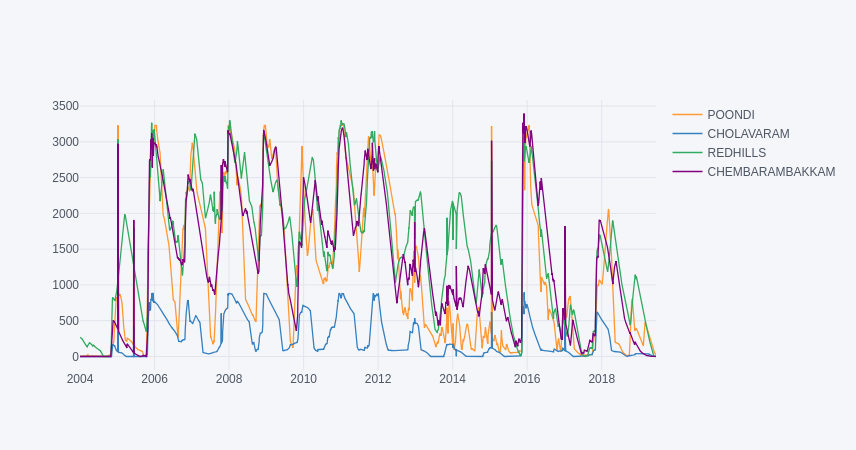

In [143]:
df_rlevels[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].iplot()

# Reservoirs capacity /intake details

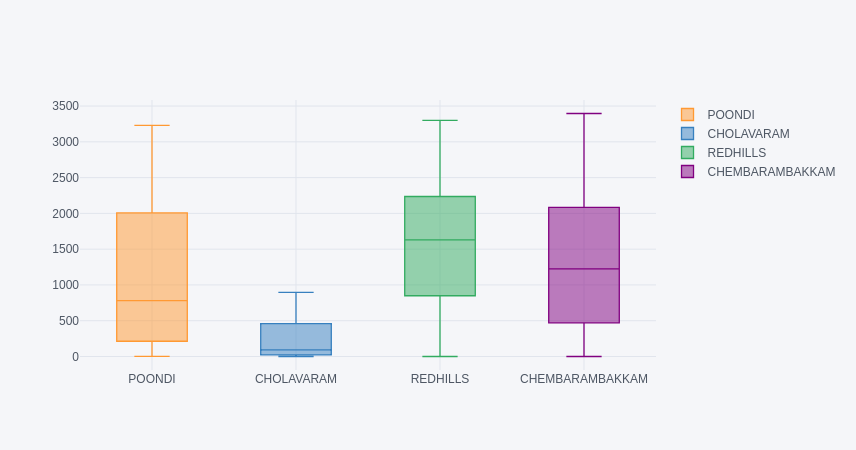

In [176]:
df_rlevels[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].iplot(kind='box')

## Rainfall in last 15 years

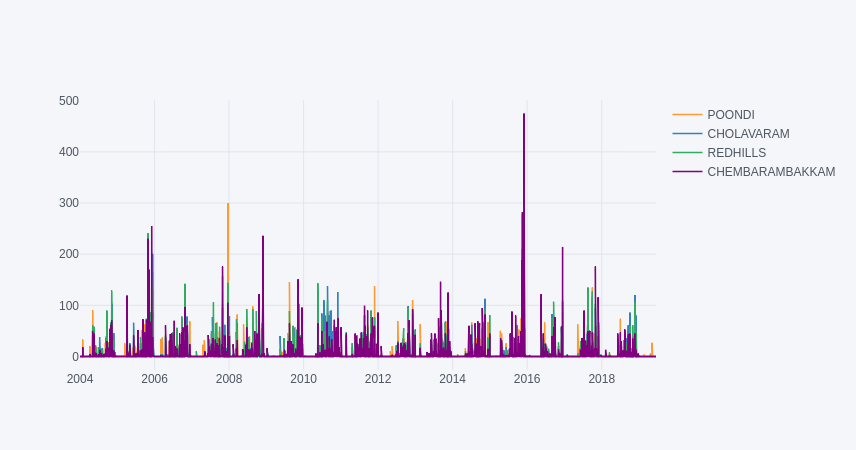

In [149]:
df_rfall[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].iplot()

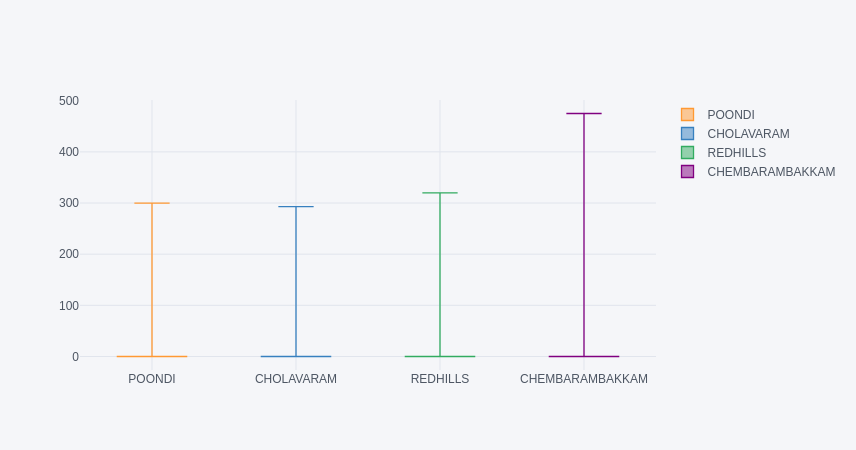

In [177]:
df_rfall[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].iplot(kind='box')

## Correlation among reservoirs



In [150]:

corr_rfall = df_rfall.corr()
corr_rfall


POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
POONDI           1.000000    0.711964  0.712009         0.684963
CHOLAVARAM       0.711964    1.000000  0.904036         0.745151
REDHILLS         0.712009    0.904036  1.000000         0.783919
CHEMBARAMBAKKAM  0.684963    0.745151  0.783919         1.000000

In [151]:
corr_rlevels = df_rlevels[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].corr()
corr_rlevels

POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
POONDI           1.000000    0.833263  0.806738         0.885496
CHOLAVARAM       0.833263    1.000000  0.758682         0.811611
REDHILLS         0.806738    0.758682  1.000000         0.862584
CHEMBARAMBAKKAM  0.885496    0.811611  0.862584         1.000000

## Analysis of total reservoir level and total rainfall

## Month based total resorvoir level and total rain fall

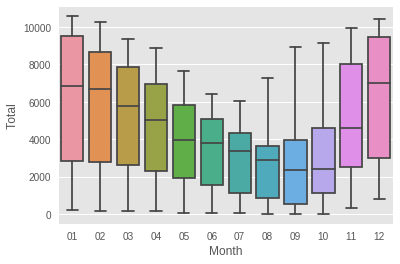

In [153]:
sns.boxplot(x='Month', y='Total',data=df_rlevels)

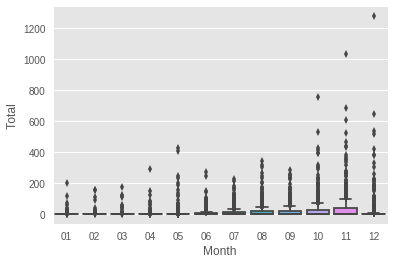

In [154]:
sns.boxplot(x='Month', y='Total',data=df_rfall)

### Year based reservoir level and rainfall

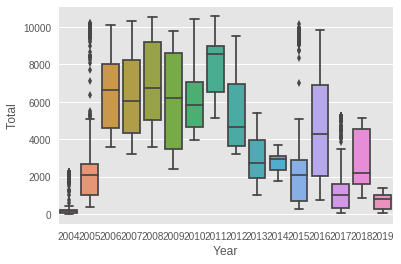

In [155]:

sns.boxplot(x='Year', y='Total',data=df_rlevels)

Maximum rainfall occurs during 09,10,11th months ( Sept, Oct and Nov)


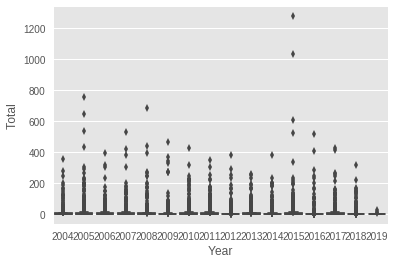

In [156]:
sns.boxplot(x='Year', y='Total',data=df_rfall,)

In [157]:
##df_poondi[ (df_poondi.index > pd.to_datetime('2010/11/12')) &  (df_poondi.index < pd.to_datetime('2010/11/18'))]

## Year and month wise total rainfall and reservoir level

In [184]:
df_yearly_rainfall= df_rfall.groupby('Year').sum()


In [181]:
df_monthly_rainfall =  df_rfall.groupby(['Year','Month']).sum() 


In [182]:
df_yearly_level = df_rlevels.groupby('Year').mean()

In [183]:
df_monthly_level = df_rlevels.groupby(['Year','Month']).mean()

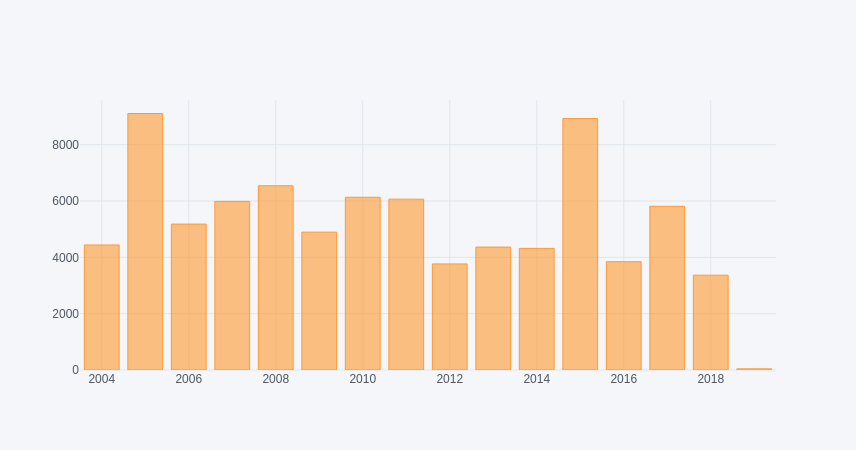

In [172]:
df_yearly_rainfall.iplot(kind='bar',y='Total')
#sns.barplot(x=df_yearly_rainfall.index,y='Total', data=df_yearly_rainfall)

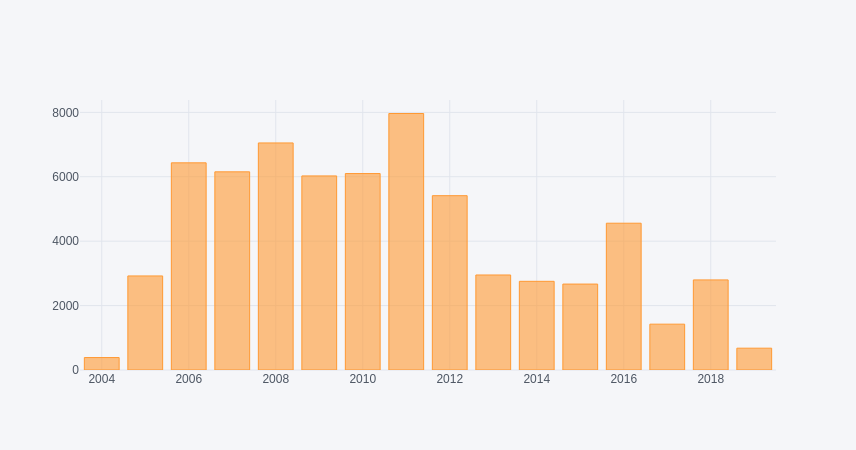

In [171]:
df_yearly_level.iplot(kind='bar',y='Total')
#sns.barplot(x=df_yearly_level.index,y='Total', data=df_yearly_level)

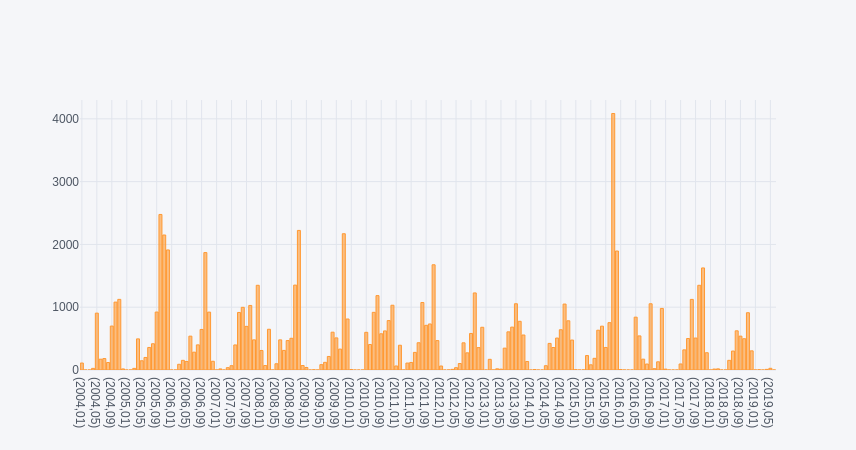

In [124]:
df_monthly_rainfall.iplot(kind='bar',y='Total')


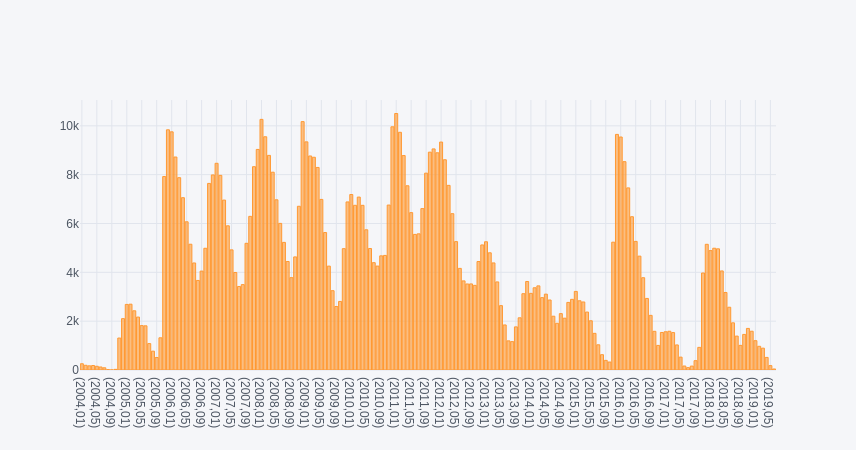

In [108]:
df_monthly_level.iplot(kind='bar', y='Total')

In [86]:
monthly_corr = df_monthly_rainfall.corrwith(df_monthly_level,axis=0)
monthly_corr 

POONDI             0.014681
CHOLAVARAM         0.082055
REDHILLS          -0.058428
CHEMBARAMBAKKAM    0.079865
Total              0.021444
dtype: float64

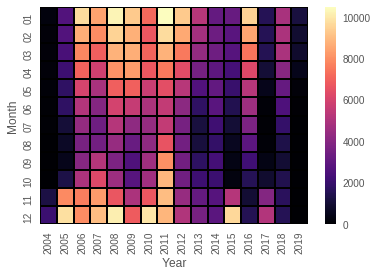

In [239]:
pt_level = df_rlevels.pivot_table(index='Month',columns='Year',values='Total')
pt_level = pt_level.fillna(0)
sns.heatmap(data=pt_level,cmap='magma',linewidth=1, linecolor='black')

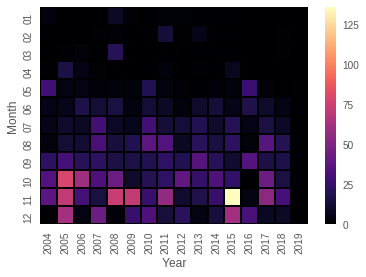

In [246]:
pt_rainfall = df_rfall.pivot_table(index='Month',columns='Year',values='Total')
pt_rainfall = pt_rainfall.fillna(0)
sns.heatmap(data=pt_rainfall,cmap='magma',linewidth=1, linecolor='black')

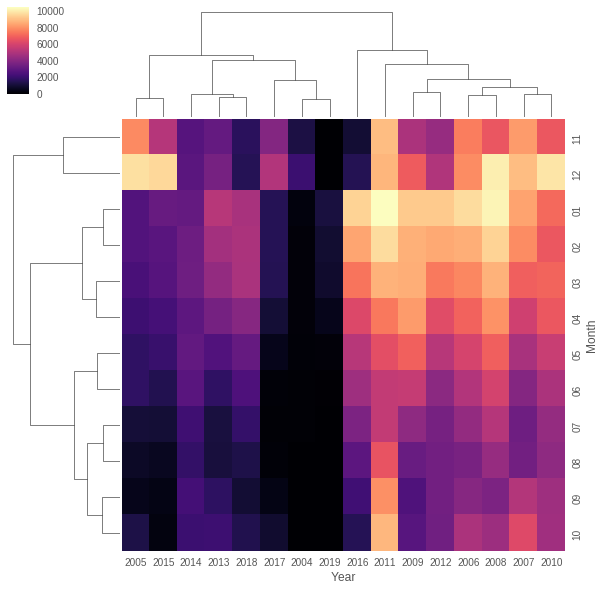

In [242]:
sns.clustermap(data=pt_level,cmap='magma')


#pt_level

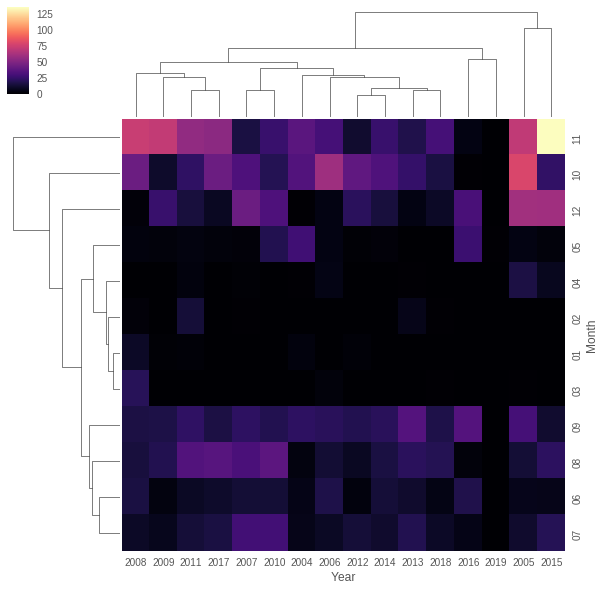

In [249]:
sns.clustermap(data=pt_rainfall,cmap='magma')
#pt_rainfall

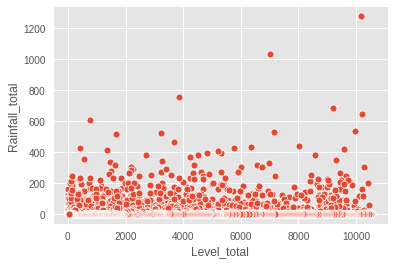

In [256]:
df_total = pd.concat([df_rlevels['Total'], df_rfall['Total'],df_rlevels['Year'],df_rlevels['Month']], axis=1, keys=[ 'Level_total', 'Rainfall_total', 'Year','Month'])
sns.scatterplot(y='Rainfall_total',x='Level_total',data=df_total)

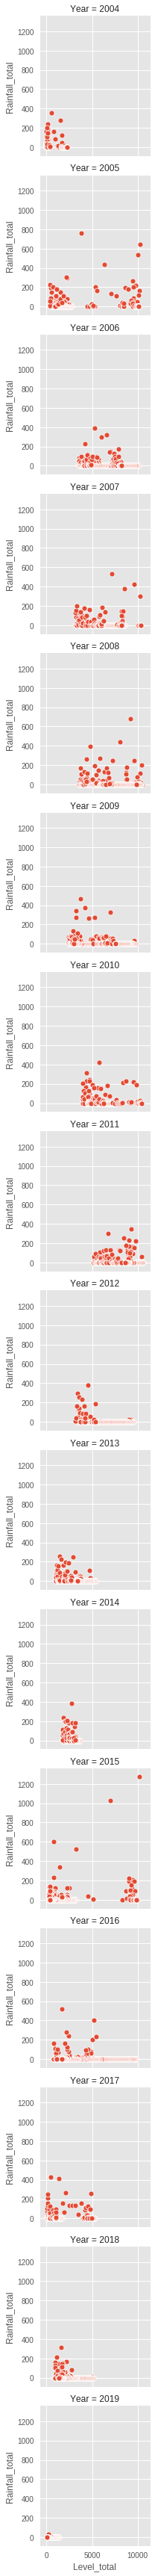

In [258]:
g = sns.FacetGrid(data=df_total,row='Year')
g.map(sns.scatterplot,'Level_total','Rainfall_total')

# Analysis of REDHILLS resorvoir's water level and rainfall

In [87]:
df_redhills =  pd.concat([df_rlevels['REDHILLS'], df_rfall['REDHILLS'],df_rlevels['Year'],df_rlevels['Month']], axis=1, keys=['Redhills_level', 'Redhills_rainfall', 'Year','Month'])
df_redhills['Redhills_level'] = df_redhills['Redhills_level'].apply(float)
df_redhills['Redhills_rainfall'] = df_redhills['Redhills_rainfall'].apply(float)

In [100]:
df_redhills_monthly = df_redhills.groupby(['Year','Month']).sum()
df_redhills_monthly.corr()

Redhills_level  Redhills_rainfall
Redhills_level           1.000000          -0.053239
Redhills_rainfall       -0.053239           1.000000

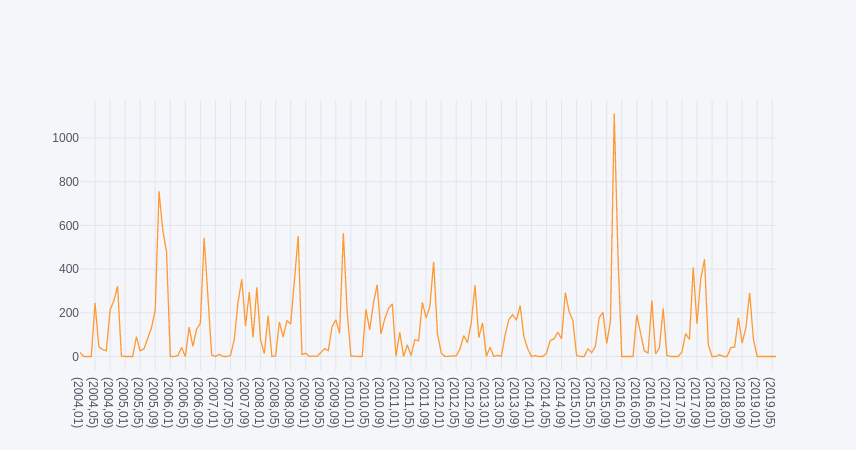

In [98]:
df_redhills_monthly.iplot(kind='line', y="Redhills_rainfall")

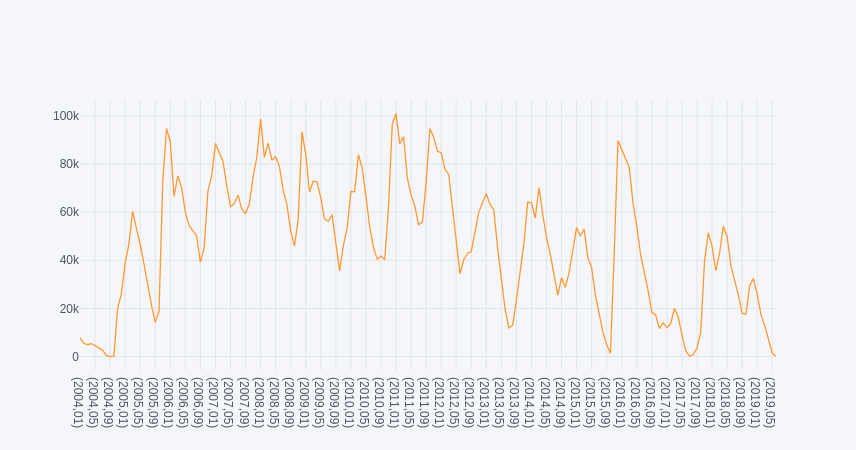

In [99]:
df_redhills_monthly.iplot(kind='line', y="Redhills_level")

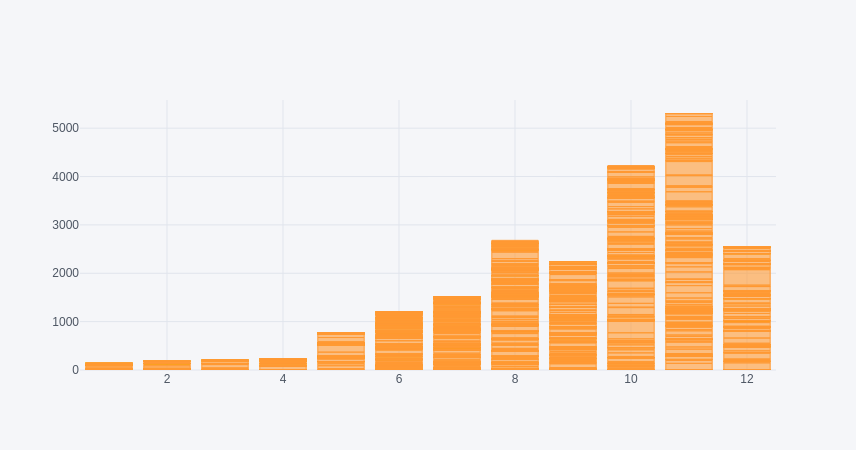

In [104]:
df_redhills.iplot(kind='bar',x='Month',y='Redhills_rainfall')

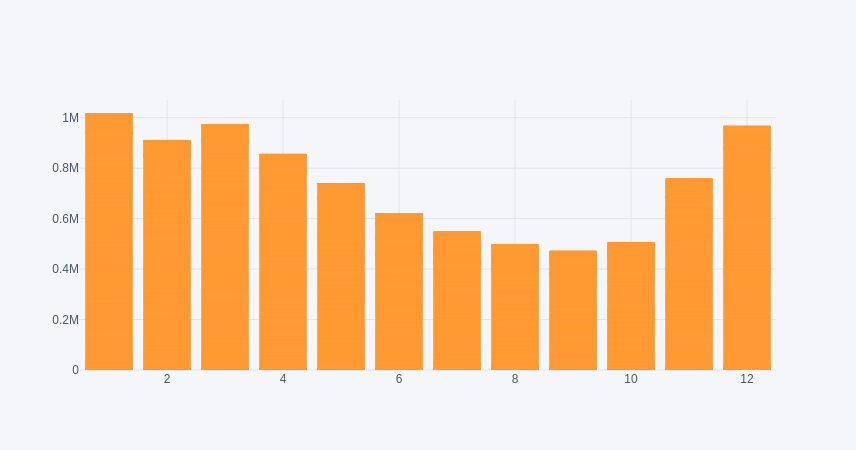

In [103]:
df_redhills.iplot(kind='bar',x='Month',y='Redhills_level')

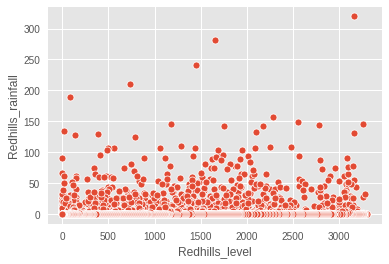

In [250]:
sns.scatterplot(y='Redhills_rainfall',x='Redhills_level',data=df_redhills)

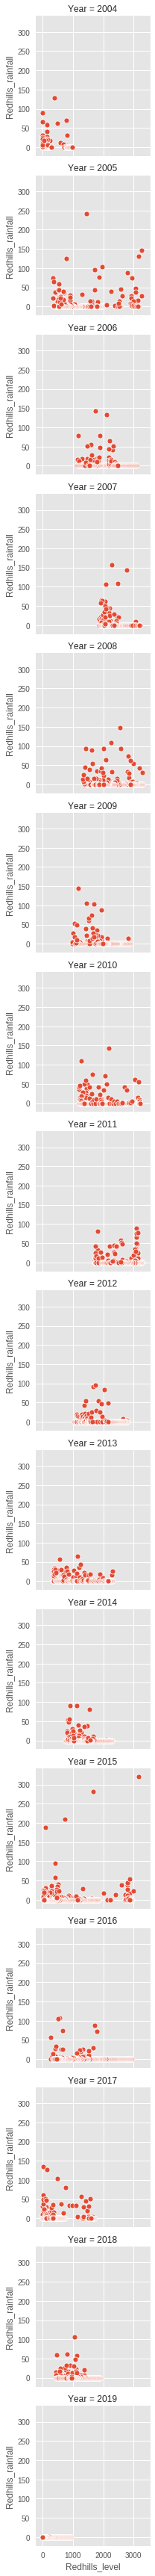

In [254]:
g = sns.FacetGrid(data=df_redhills,row='Year')
g.map(sns.scatterplot,'Redhills_level','Redhills_rainfall')